In [1]:
%load_ext autoreload
%autoreload 2

from main import *

import matplotlib.pyplot as plt

def solve_numerically(selected_solver: str):
# Set the numerical solver stated in the selected_solver argument
    match selected_solver:
        case "Explicit Euler":
            func = explicit_euler.solve
        case "Symplectic Euler":
            func = symplectic_euler.solve
        case _:
            raise ValueError(f"{selected_solver} is not a known solver.")

    # Solve PDE for initial state Y0 and time span t_span
    return func(double_pendulum.vector_field, "_", Y0, T_SPAN)

def plot_phase_space(y_exp, y_sym):
    """
    Plot a projected phase-space trajectory for the double pendulum,
    e.g. (theta1, p_theta1). Adapt if you wish to project differently.
    """
    plt.figure(figsize=(6,4))
    plt.plot(y_exp[:, 0], y_exp[:, 1], label='Explicit Euler', alpha=0.8)
    plt.plot(y_sym[:, 0], y_sym[:, 1], label='Symplectic Euler', alpha=0.8)
    plt.title("Double Pendulum Phase Space (Projected)")
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$p_{\theta_1}$")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


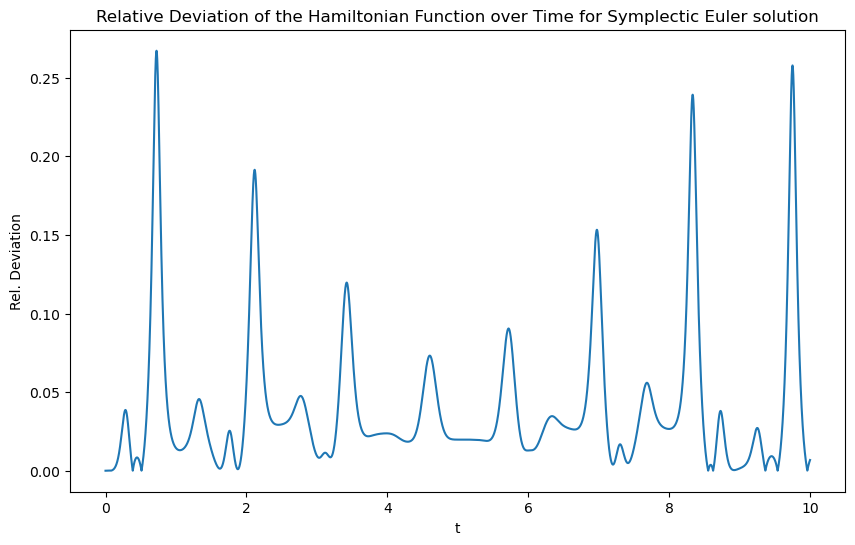

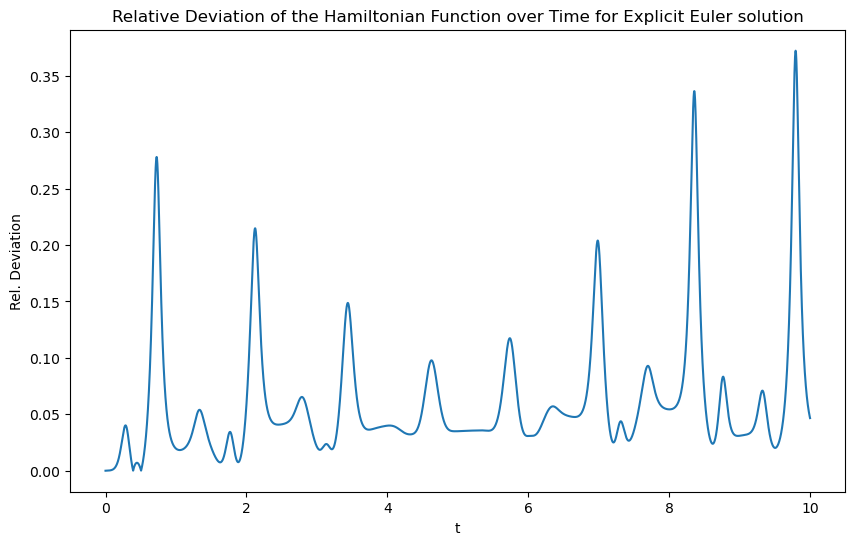

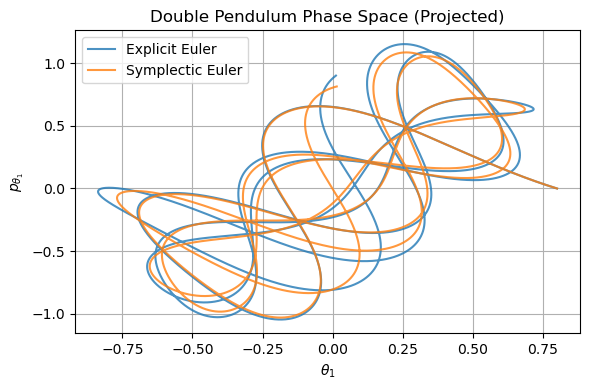

In [3]:
selected_solver = "Symplectic Euler"
t_sym, y_sym = solve_numerically("Symplectic Euler")

# Plot the Hamiltonian over time to see if it stays constant
utils.plot_hamiltonian_deviation_over_time(t_sym, y_sym, selected_solver)

selected_solver = "Explicit Euler"
t_exp, y_exp = solve_numerically("Explicit Euler")
# Plot the Hamiltonian over time to see if it stays constant
utils.plot_hamiltonian_deviation_over_time(t_exp, y_exp, selected_solver)

# Plot the phase space trajectory
plot_phase_space(y_exp, y_sym)